---
---
# Convolutional Networks
---
---

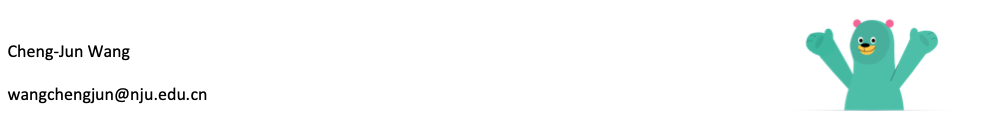

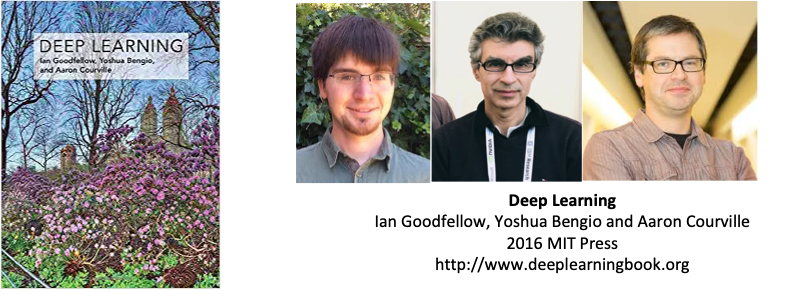

https://www.deeplearningbook.org/contents/convnets.html

Convolutional networks (LeCun, 1989), also known as convolutional neural networks, or CNNs, are a specialized kind of neural network for processing data that has a known *grid-like topology*. 

- time-series data,  1-D grid 
- image data, 2-D grid of pixels. 

The name “convolutional neural network” indicates that the network employs a mathematical operation called `convolution`. 

- Convolution is a specialized kind of linear operation. 
- Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers.

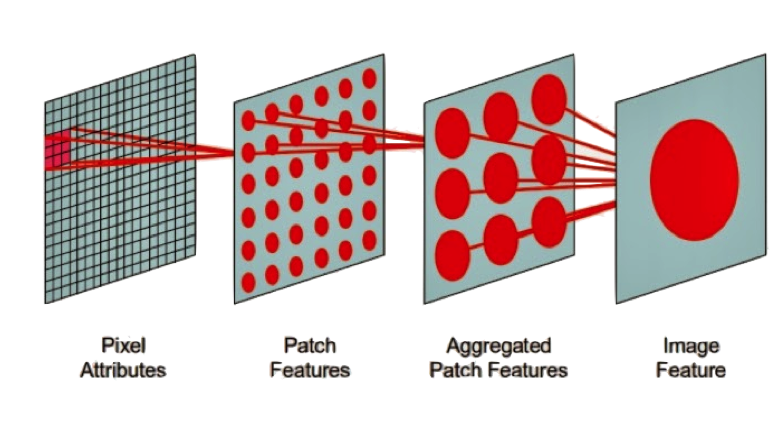

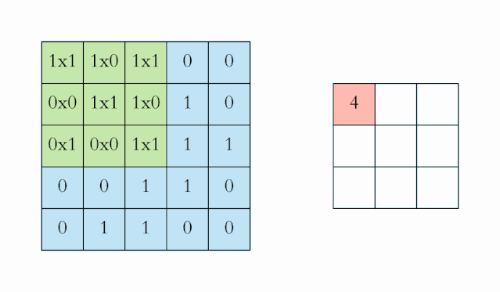

全连接前馈网络在图像处理中的缺点：图像数据维度太高（一个像素点被视为一个维度），而且由于图像很多信息在高层次才体现，在过低的层次分析导致过拟合以及训练效率过低。
- Scale up neural networks to process very large images / video sequences
    - Sparse connections
    - Parameter sharing
- Automatically generalize across spatial translations of inputs
- Applicable to any input that is laid out on a grid (1-D, 2-D, 3-D, …)

- Replace matrix multiplication in neural nets with convolution
- Everything else stays the same
    - Maximum likelihood
    - Back-propagation
    - etc.

### The Convolution Operation

Suppose we are tracking the location of a spaceship with a laser tensor.

$x(t)$ denote the location of the `spaceship` at time `t`. Assume that our laser sensor is somewhat noisy, we would like to average together several measurements. But we would like to give more weight to recent measurements with a weight function $w(a)$, wheare $a$ is the age of a measurement. We can obtain a new function s providing a smoothed estimate of the position of the spaceship.

$$ s(t) = \int x(a) w(t-a) da$$




**Convolution network terminology**
- input: function $x$
- kernal: function $w$
- featuremap: output


In machine learning applications, the input is usually **a multidimensional array** of data, and the kernel is usually a multidimensional array of parameters that are adapted by the learning algorithm. We will refer to these multidimensional arrays as **tensors**.

**Discrete Convolution**

We only measure at discreted timestamp

$$ s(t) = \sum_{a = -\infty}^{\infty} x(a) w(t-a) da$$

Finally, we often use convolutions over more than one axis at a time. For example, if we use a two-dimensional image $I$ as our input, we probably also want to use a two-dimensional kernel 

$$S(i, j) = (I ∗ K)(i, j) =\sum_m \sum_n I(m, n)K(i − m, j − n)$$

Discrete convolution can be viewed as multiplication by a matrix

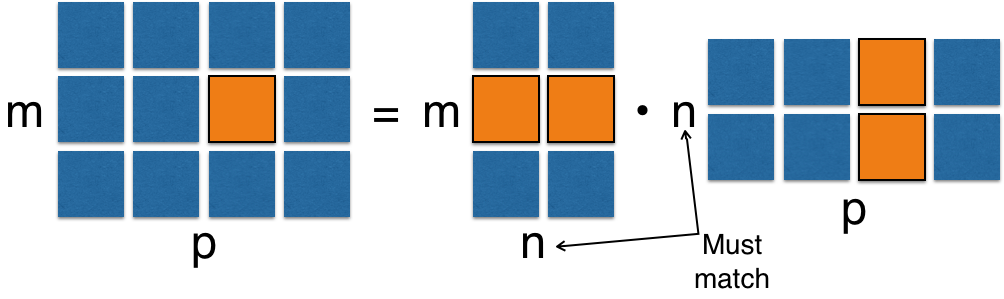

Matrix (Dot) Product

**2D Convolution**

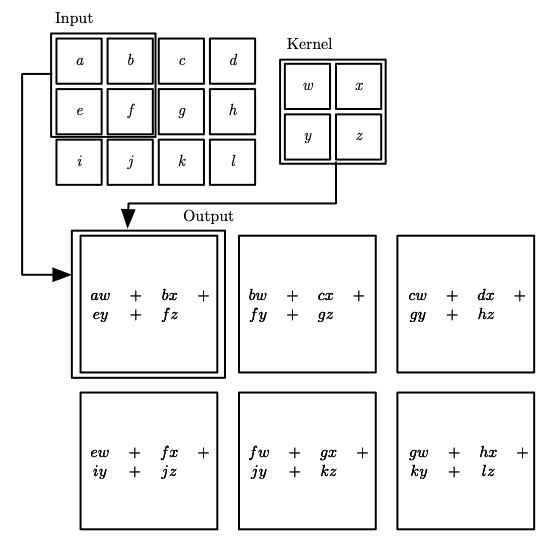

Discrete convolution can be viewed as multiplication by a matrix
本质来说，CNN基于一个假设：即使每个像素只偏移一点点，图片的整体信息仍然不变。从而可以用卷积操作高效降维度。

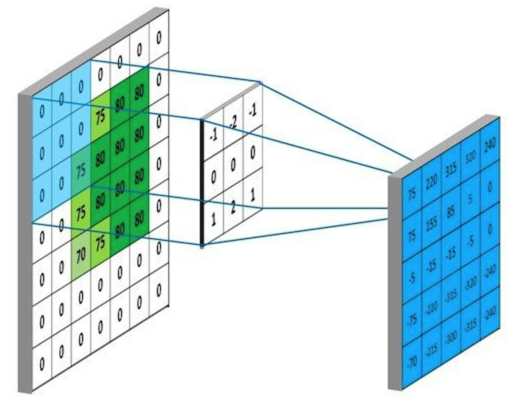

**Padding**

每次卷积操作都会使图像缩小，角落和边缘区域的像素点使用的很少，即丢失了图像边缘位置的信息。为了解决这两个问题，在卷积操作之前，先对图像周围进行填充，通常为zero-padding，即填充0。

### Three Operations
- Convolution: like matrix multiplication
    - Take an input, produce an output (hidden layer)
- “Deconvolution”: like multiplication by transpose of a matrix
    - Used to back-propagate error from output to input
    - Reconstruction in autoencoder / RBM
- Weight gradient computation
    - Used to backpropagate error from output to weights
    - Accounts for the parameter sharing

Convolution leverages three important ideas that can help improve a machine learning system: 
- sparse interactions, 
- parameter sharing,  
    - equivariant representations.
        $$f(g(x)) = g(f(x))$$
    
    if we move the object in the input, its representation wil move the same amount in the outupt.

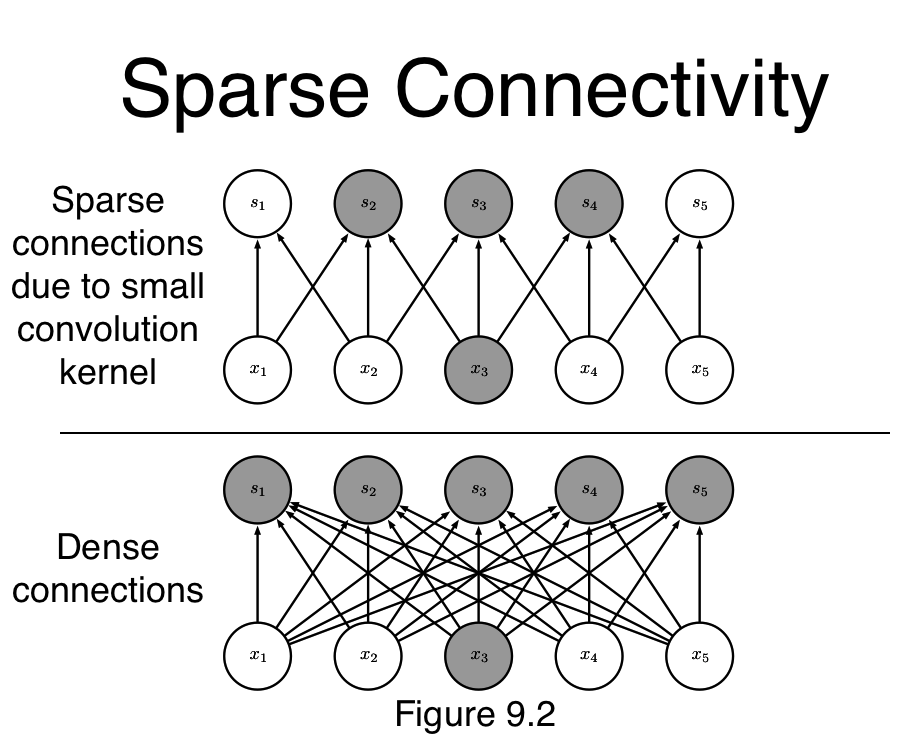

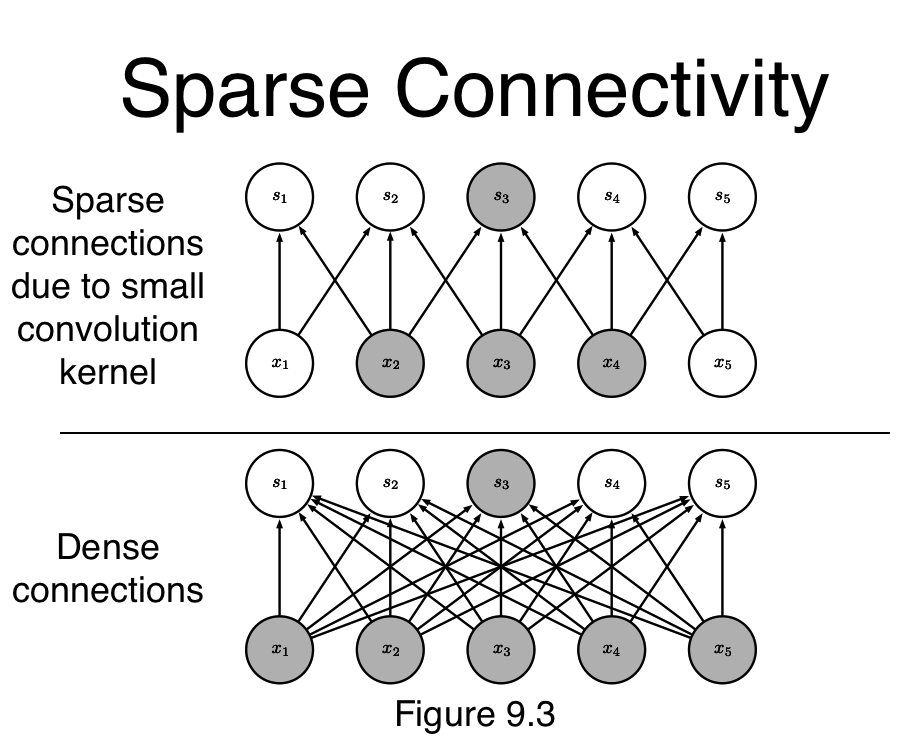

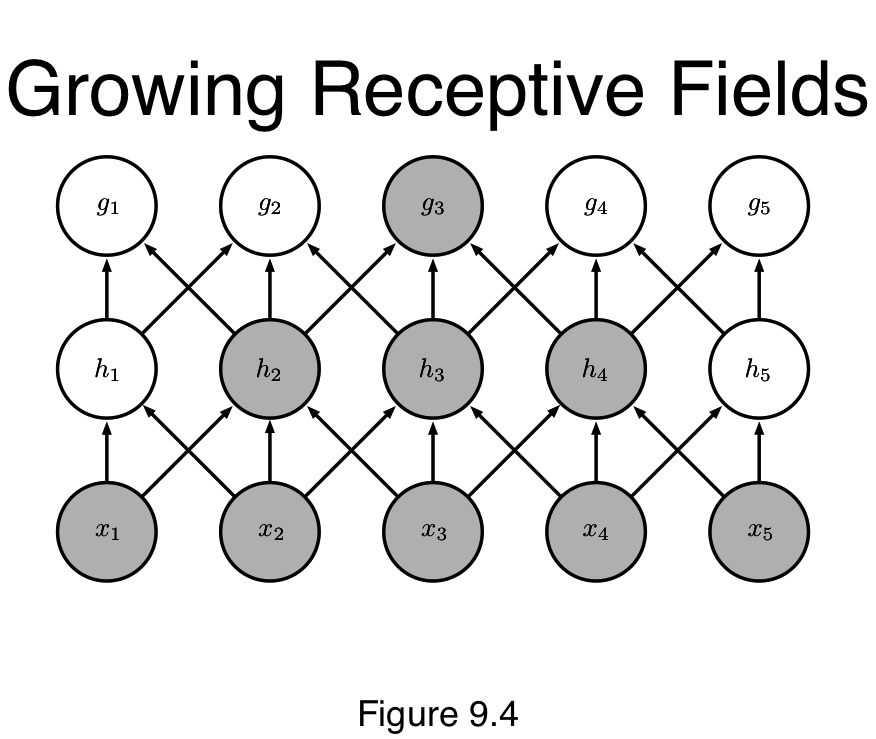

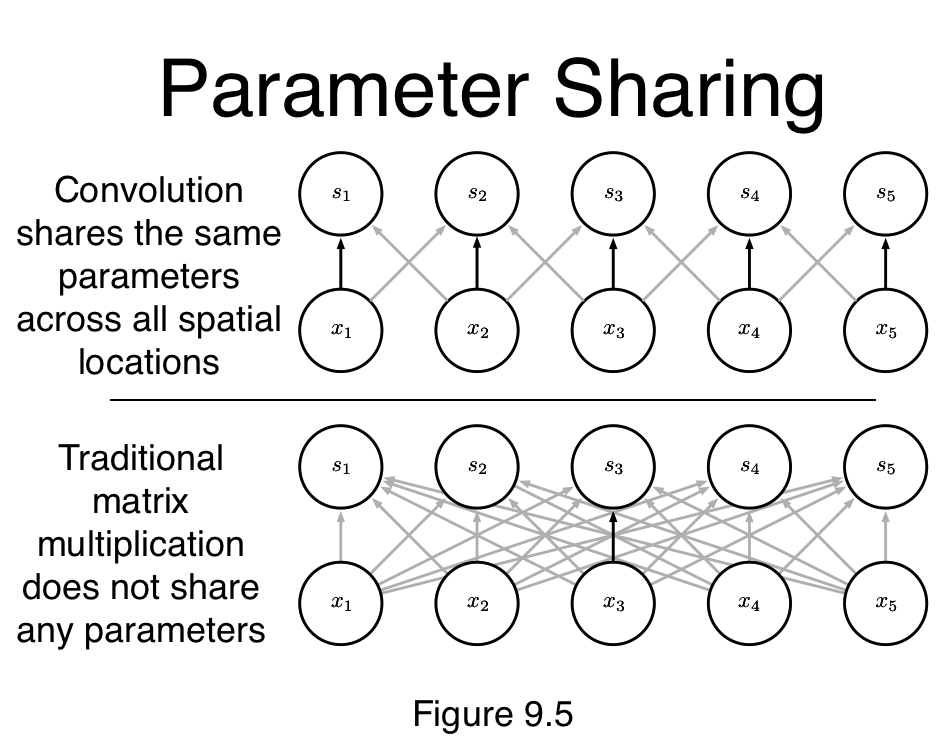

Example: Edge Detection by Convolution

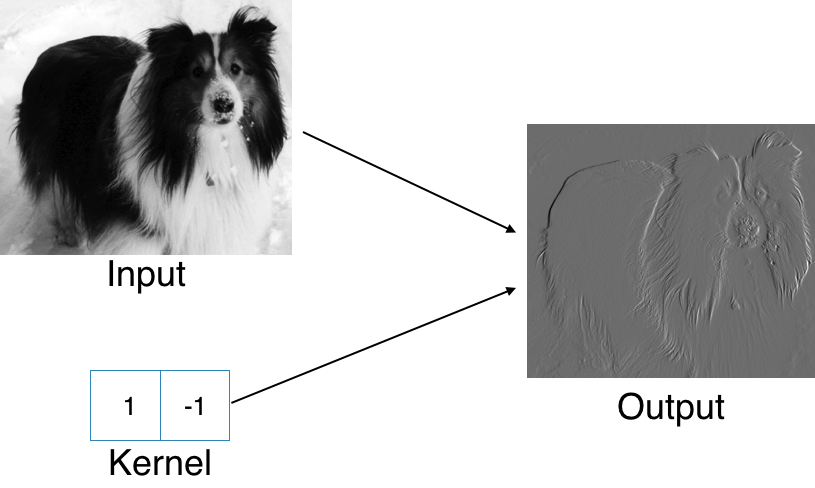

[卷积的直观理解](https://github.com/computational-class/summer-school/blob/master/class_03_%E5%8D%B7%E7%A7%AF%E7%9A%84%E7%9B%B4%E8%A7%82%E7%90%86%E8%A7%A3.pdf)

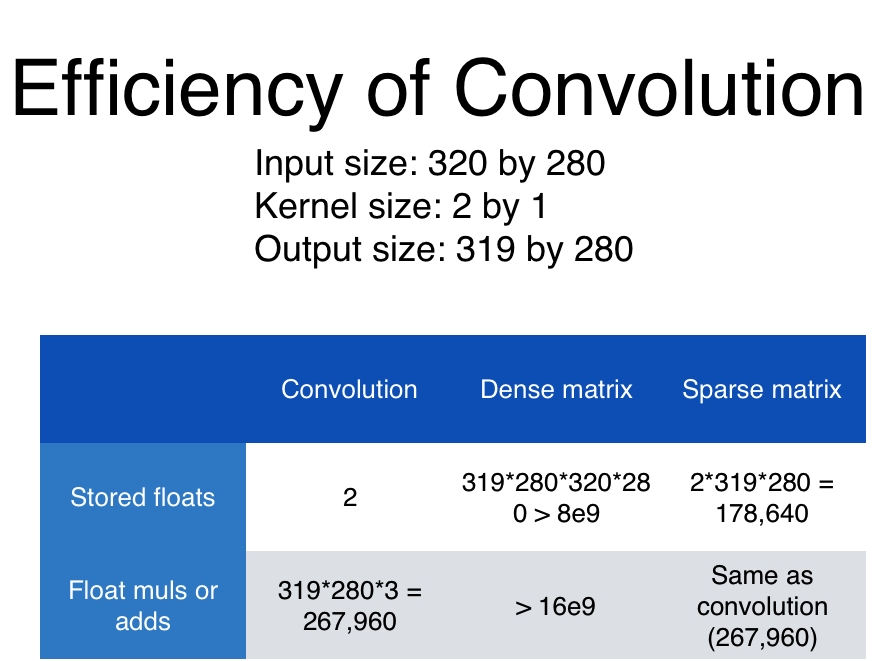

A typical layer of a convolutional network consists of **three stages**

- In the ﬁrst stage, the layer performs several **convolutions** in parallel to produce aset of linear activations. 
- In the second stage, each linear activation is run through a nonlinear activation function, such as the rectiﬁed linear activation function. This stage is sometimes called the **detector** stage. 
- In the third stage, we use **apooling** function to modify the output of the layer further.


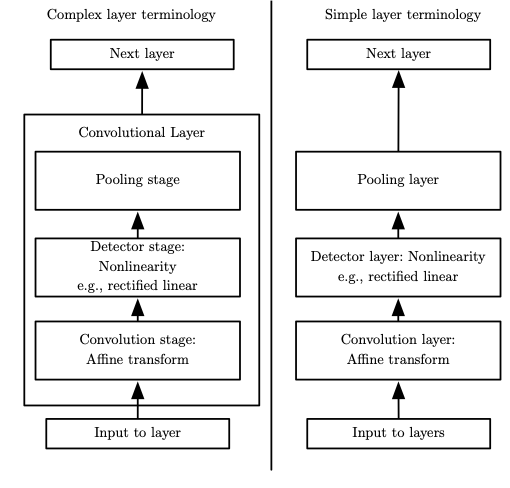

## Pooling 池化

**A pooling function** replaces the output of the net at a certain location with a summary statistic of the nearby outputs. 

For example, the **max pooling** (Zhou and Chellappa, 1988) operation reports the maximum output within a rectangular neighborhood. 

Other popular pooling functions include 
- the average of a rectangularneighborhood, 
- the L2 norm (每个元素的平方的和) of a rectangular neighborhood,  
- a weighted average based on the distance from the central pixel.


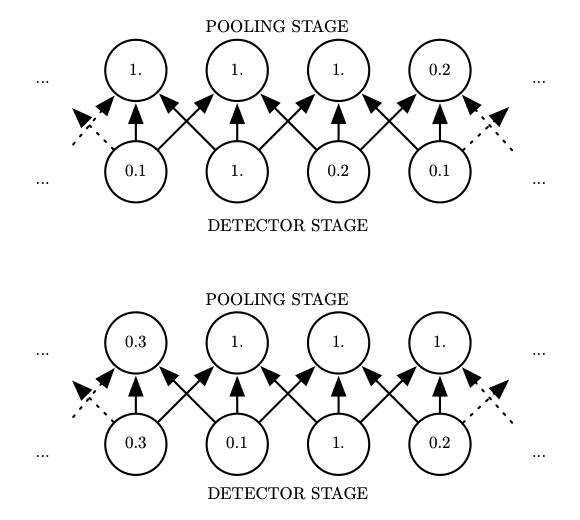

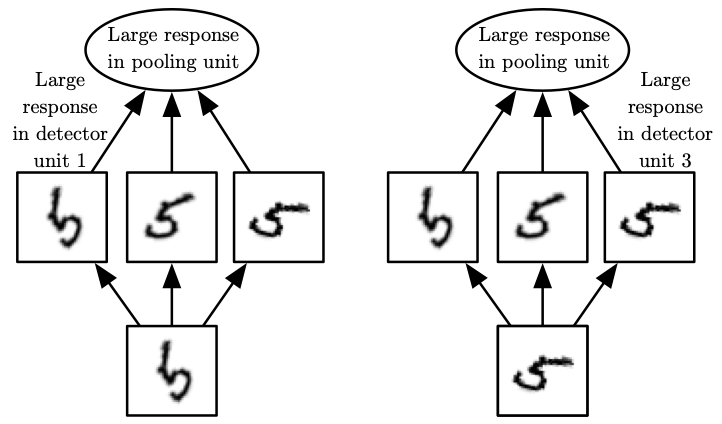

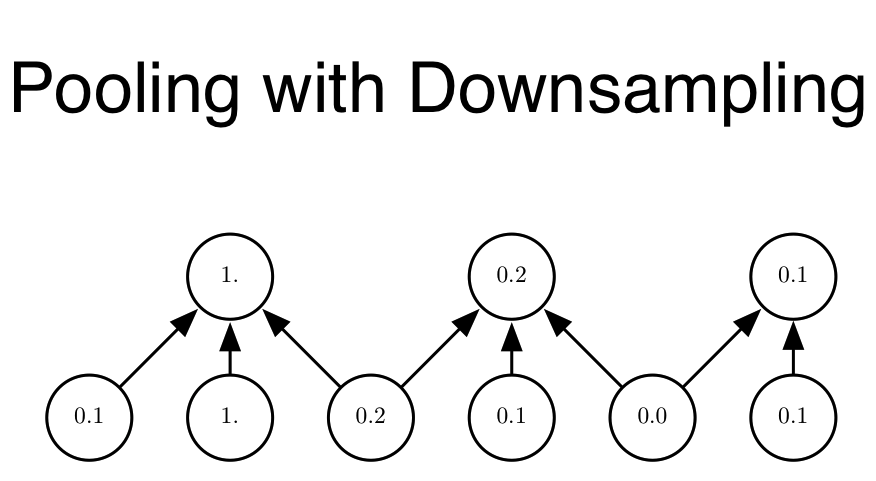

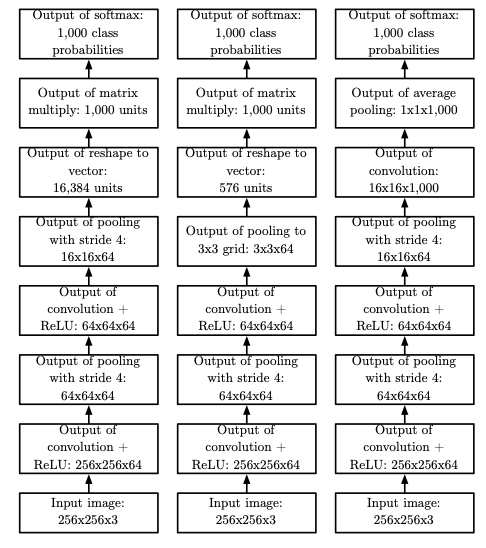

The human eye is mostly very low resolution, except for a tiny patch called the fovea. The fovea only observes an area about the size of a thumbnail held at arms length. 

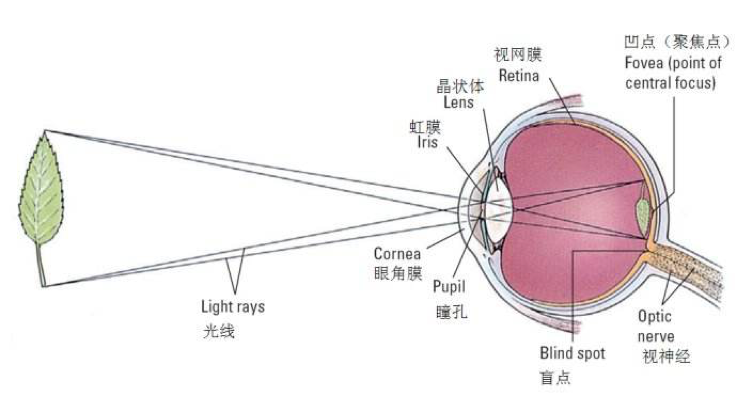

Though we feel as if we can see an entire scene in high resolution, this is an illusion created by the subconscious part of our brain, as it stitches together several glimpses of small areas. 

Most convolutional networks actually receive large full-resolution photographs as input. 

The human brain makes several eye movements called saccadesto glimpse the most visually salient or task-relevant parts of a scene. 

Incorporating similar attention mechanisms into deep learning models is an active research direction.

https://atcold.github.io/pytorch-Deep-Learning/

## 使用PyTorch建立卷积神经网络并处理MNIST数据

https://computational-communication.com/pytorch-mnist/

https://github.com/computational-class/summer-school/blob/master/class_04_CNN.ipynb

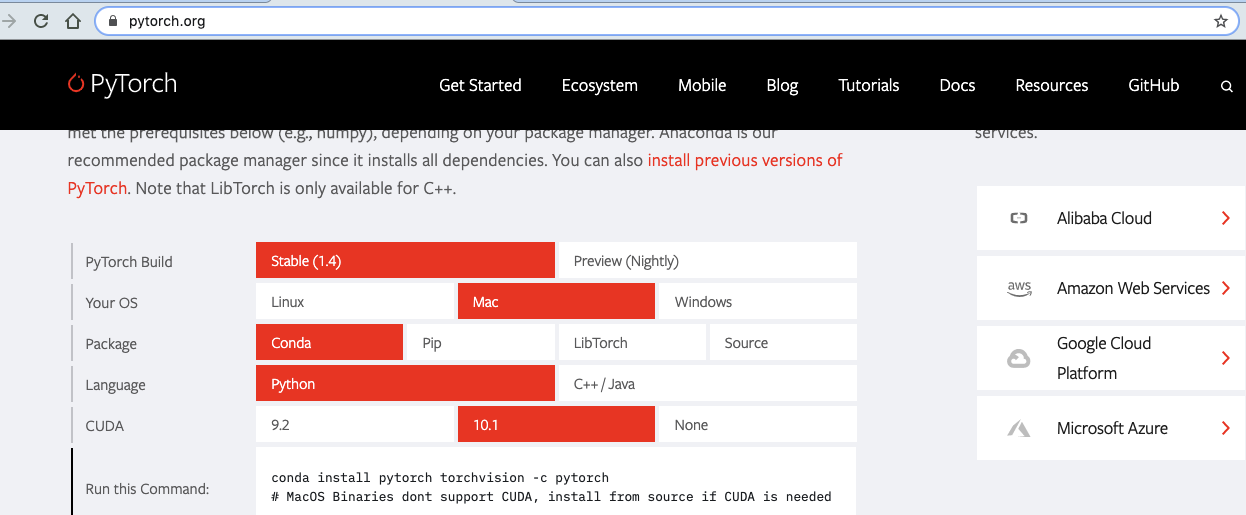

https://pytorch.org/

In [3]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.autograd import Variable

In [22]:
# MNIST Dataset
train_dataset = datasets.MNIST(root='../data/',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)
                            # change it to False after you have downloaded the data

test_dataset = datasets.MNIST(root='../data/',
                           train=False,
                           transform=transforms.ToTensor())

In [24]:
# Hyper Parameters
batch_size = 100 
learning_rate = 0.001
num_epochs = 5

In [25]:
# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [26]:
import numpy as np
import pylab as plt
import torchvision

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

In [31]:
images.shape

torch.Size([100, 1, 28, 28])

tensor(7) tensor(9) tensor(9) tensor(6) tensor(7)


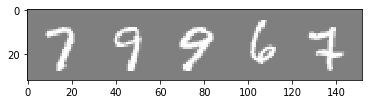

In [33]:
# show images
imshow(torchvision.utils.make_grid(images[:5]))
# print labels
print(' '.join('%5s' % labels[j] for j in range(5)))

In [35]:
torch.cuda.is_available()

False

In [37]:
# CNN Model (2 conv layer)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            # in_channels=1 (图片只有一种颜色), out_channels=16(16个不同的卷积核，产生16个卷积结果)
            # kernel_size: 每个卷积核的边长， padding：图片周围加两圈0
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            # apply batch normalization
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
            # 每个kernel take all channels from input and comebine them into one channel
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(7*7*32, 10) 
        # a linear transformation AX +b: 把7*7*32维的张量 reduce 成 (x1,..,x10)的10维向量

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

cnn = CNN()

In [39]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

In [45]:
images[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [43]:
images[0].shape

torch.Size([1, 28, 28])

In [46]:
# Train the Model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images)
        labels = Variable(labels)

        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        if (i+1) % 200 == 0:
            print ('Epoch [%d/%d], Iter [%d/%d] Loss: %.4f'
                   %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data.item()))


Epoch [1/5], Iter [200/600] Loss: 0.0932
Epoch [1/5], Iter [400/600] Loss: 0.0841
Epoch [1/5], Iter [600/600] Loss: 0.0559
Epoch [2/5], Iter [200/600] Loss: 0.1323
Epoch [2/5], Iter [400/600] Loss: 0.0386
Epoch [2/5], Iter [600/600] Loss: 0.0586
Epoch [3/5], Iter [200/600] Loss: 0.1227
Epoch [3/5], Iter [400/600] Loss: 0.0483
Epoch [3/5], Iter [600/600] Loss: 0.0633
Epoch [4/5], Iter [200/600] Loss: 0.0392
Epoch [4/5], Iter [400/600] Loss: 0.0121
Epoch [4/5], Iter [600/600] Loss: 0.0071
Epoch [5/5], Iter [200/600] Loss: 0.0134
Epoch [5/5], Iter [400/600] Loss: 0.0347
Epoch [5/5], Iter [600/600] Loss: 0.0491


In [51]:
# Test the Model
cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
correct = 0
total = 0
for images, labels in test_loader:
    images = Variable(images)
    outputs = cnn(images)
    _, predicted = torch.max(outputs.data, 1) # 自动返回数列中最大的value和对应的index
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))


Test Accuracy of the model on the 10000 test images: 98 %


/Users/distiller/project/conda/conda-bld/pytorch_1587428061935/work/aten/src/ATen/native/BinaryOps.cpp:81: UserWarning: Integer division of tensors using div or / is deprecated, and in a future release div will perform true division as in Python 3. Use true_divide or floor_divide (// in Python) instead.


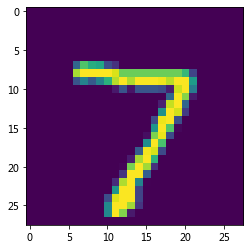

In [16]:
case=test_dataset[0][0]
case=case.reshape(1, 1, 28, 28)
plt.imshow(case[0][0])
plt.show()

In [17]:
output = cnn(case)
pred = output.argmax(dim=1, keepdim=True)
pred

tensor([[7]])

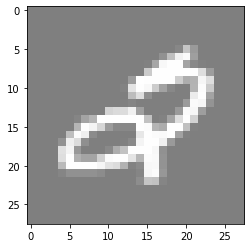

In [69]:
# 识别错误的一个例子---即使人工也很难认出这是什么数字，说明CNN的准确率已经达到较高水平
imshow(torchvision.utils.make_grid(images[4]))

- Chapter 9, Deep Learning. Ian Goodfellow et al. 2016 
http://www.deeplearningbook.org/contents/convnets.html
- CNN Explainer: Learning Convolutional Neural Networks with Interactive Visualization https://poloclub.github.io/cnn-explainer/

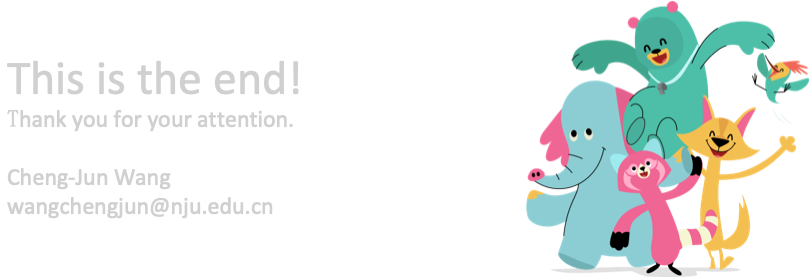